In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
cd /gdrive/My Drive/APTUM/dataset

/gdrive/My Drive/APTUM/dataset


# IMPORTING LIBRARIES

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
from tensorflow import set_random_seed

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

Using TensorFlow backend.


#SETTING COLORS FOR PLOT

In [ ]:
%matplotlib inline
plt.rcParams.update({'text.color' : "Black",
                     'axes.labelcolor' : "white",
                     'xtick.color' : "white",
                     'ytick.color' : "white"})

#MERGING DATA

In [ ]:
data_dir = '1st_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['b1_x', 'b1_y', 'b2_x', 'b2_y', 'b3_x', 'b3_y', 'b4_x', 'b4_y']

2003.11.16.07.18.46
2003.11.16.07.28.46
2003.11.16.07.38.46
2003.11.16.07.48.46
2003.11.16.07.58.46
2003.11.16.08.08.46
2003.11.16.08.18.46
2003.11.16.08.28.46
2003.11.16.08.38.46
2003.11.16.08.48.46
2003.11.16.08.58.46
2003.11.16.09.08.46
2003.11.16.09.18.46
2003.11.16.09.28.46
2003.11.16.09.38.46
2003.11.16.09.48.46
2003.11.16.09.58.46
2003.11.16.10.08.46
2003.11.16.10.18.46
2003.11.16.10.28.46
2003.11.16.10.38.46
2003.11.16.10.48.46
2003.11.16.10.58.46
2003.11.16.11.08.46
2003.11.16.11.18.46
2003.11.16.11.28.46
2003.11.16.11.38.46
2003.11.16.11.48.46
2003.11.16.11.58.46
2003.11.16.12.08.46
2003.11.16.12.18.46
2003.11.16.12.28.46
2003.11.16.12.38.46
2003.11.16.12.48.46
2003.11.16.12.58.46
2003.11.16.13.08.46
2003.11.16.13.18.46
2003.11.16.13.28.46
2003.11.16.13.38.46
2003.11.16.13.48.46
2003.11.16.13.58.46
2003.11.16.14.08.46
2003.11.16.14.18.46
2003.11.16.14.28.46
2003.11.16.14.38.46
2003.11.16.14.48.46
2003.11.16.14.58.46
2003.11.16.15.08.46
2003.11.16.15.18.46
2003.11.16.15.28.46


In [ ]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_1.csv')
merged_data.head()

,b1_x,b1_y,b2_x,b2_y,b3_x,b3_y,b4_x,b4_y
2003-10-22 12:06:24,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
2003-10-22 12:09:13,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2003-10-22 12:14:13,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
2003-10-22 12:19:13,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
2003-10-22 12:24:13,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


In [ ]:
merged_data=pd.read_csv('merged_dataset_BearingTest_1.csv', index_col=0)
# merged_data.columns = ['a','b1_x', 'b1_y', 'b2_x', 'b2_y', 'b3_x', 'b3_y', 'b4_x', 'b4_y']
# merged_data.set_index('a')
merged_data.head()

,b1_x,b1_y,b2_x,b2_y,b3_x,b3_y,b4_x,b4_y
2003-10-22 12:06:24,0.104148,0.100253,0.107147,0.102004,0.106149,0.108150,0.094803,0.099513
2003-10-22 12:09:13,0.103651,0.099854,0.108189,0.102920,0.106661,0.108458,0.095070,0.093587
2003-10-22 12:14:13,0.105039,0.101543,0.108543,0.104042,0.108740,0.109875,0.096158,0.098299
2003-10-22 12:19:13,0.104900,0.101573,0.108152,0.103378,0.108068,0.110010,0.096814,0.098602
2003-10-22 12:24:13,0.104779,0.102181,0.107943,0.102629,0.108454,0.109350,0.096358,0.098471


#PLOTTING THE MERGED DATA

1156
1001


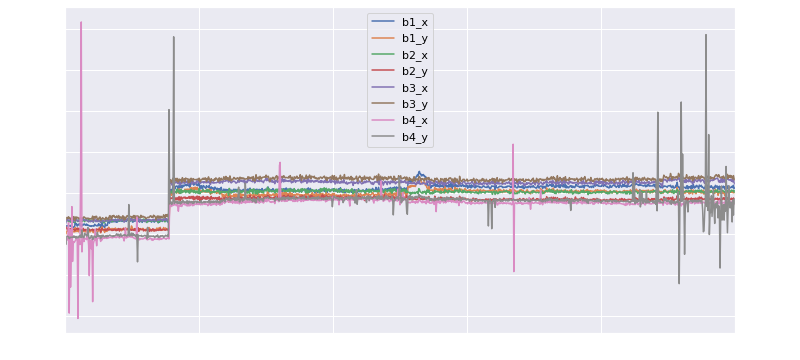

In [ ]:
dataset_train = merged_data['2003-10-22 12:06:24':'2003-11-15 05:18:46']
dataset_test = merged_data['2003-11-15 05:18:46':]
print(len(dataset_test))
print(len(dataset_train))
dataset_train.plot(figsize = (12,6))

#PREPROCESSING DATA

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

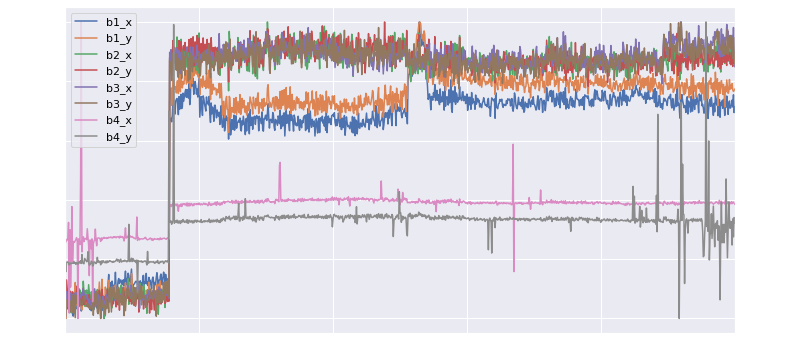

In [ ]:
X_train.plot(figsize = (12,6))

#DEFINING THE MODEL

In [ ]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


#TRAINING 

In [ ]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)




Train on 950 samples, validate on 51 samples
Epoch 1/100





950/950 [==============================] - 1s 758us/step - loss: 0.1466 - val_loss: 0.0239
Epoch 2/100
950/950 [==============================] - 0s 148us/step - loss: 0.0098 - val_loss: 0.0031
Epoch 3/100
950/950 [==============================] - 0s 138us/step - loss: 0.0043 - val_loss: 0.0028
Epoch 4/100
950/950 [==============================] - 0s 131us/step - loss: 0.0030 - val_loss: 0.0026
Epoch 5/100
950/950 [==============================] - 0s 131us/step - loss: 0.0022 - val_loss: 0.0025
Epoch 6/100
950/950 [==============================] - 0s 139us/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/100
950/950 [==============================] - 0s 135us/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/100
950/950 [==============================] - 0s 148us/step - loss: 0.0014 - val_loss: 0.0024
Epoch 9/100
950/950 [==============================] - 0s 137us/step - loss: 0.0013 - val_loss: 0.0024
Epoch 10/100
950/950

#LOSS VS EPOCH PLOT

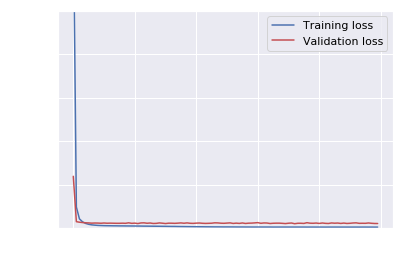

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

#PLOTTING RECONSTRUCTION ERROR

(0.0, 0.125)

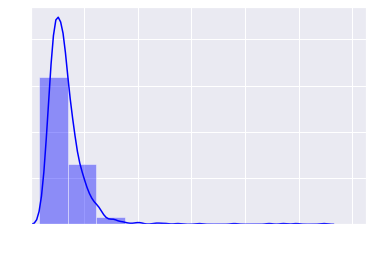

In [ ]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.125])

#SETTING THRESHOLD VALUE

In [ ]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.06
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.tail()

,Loss_mae,Threshold,Anomaly
2003-11-25 16:07:32,0.567699,0.06,True
2003-11-25 23:13:21,1.587951,0.06,True
2003-11-25 23:19:56,1.729833,0.06,True
2003-11-25 23:29:56,1.566789,0.06,True
2003-11-25 23:39:56,2.098709,0.06,True


#PLOT TO FIND BREAKDOWN

'2003-11-25 23:39:56'

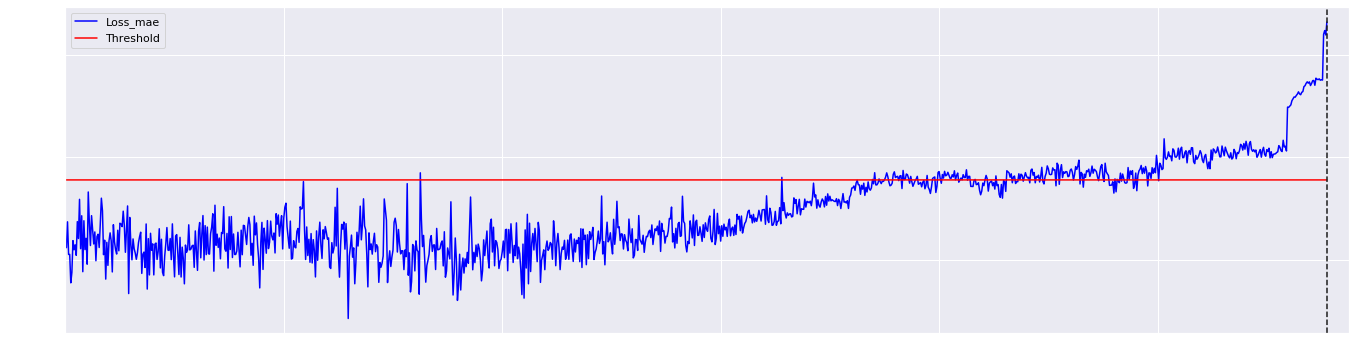

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]

In [ ]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.06
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])
scored.head()

,Loss_mae,Threshold,Anomaly
2003-10-22 12:06:24,0.011289,0.06,False
2003-10-22 12:09:13,0.019521,0.06,False
2003-10-22 12:14:13,0.012012,0.06,False
2003-10-22 12:19:13,0.008599,0.06,False
2003-10-22 12:24:13,0.011114,0.06,False


#PLOT TO FIND BREAKDOWN FOR COMPLETE DATASET

'2003-11-25 23:39:56'

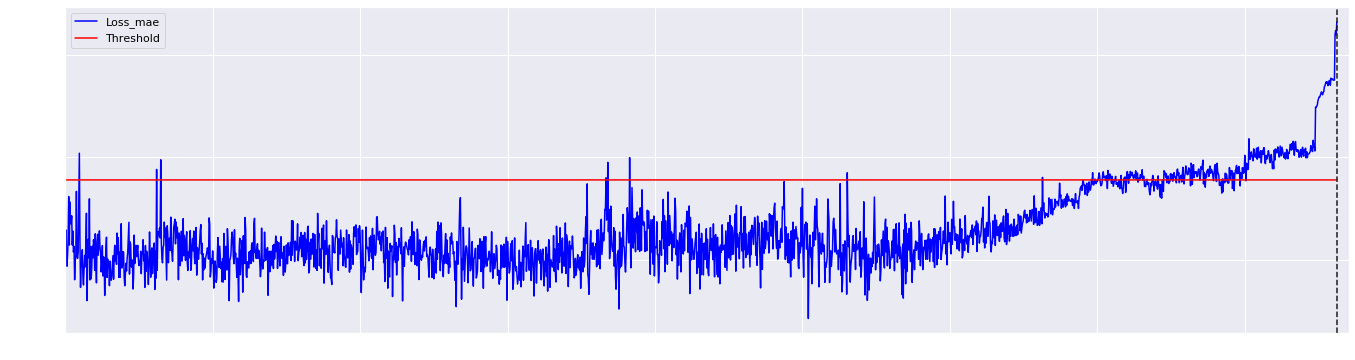

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]

In [ ]:
data_dir = '2nd_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']


2004.02.12.10.32.39
2004.02.12.10.42.39
2004.02.12.11.02.39
2004.02.12.10.52.39
2004.02.12.11.22.39
2004.02.12.11.12.39
2004.02.12.11.52.39
2004.02.12.11.42.39
2004.02.12.11.32.39
2004.02.12.12.02.39
2004.02.12.12.22.39
2004.02.12.13.02.39
2004.02.12.12.32.39
2004.02.12.12.42.39
2004.02.12.13.42.39
2004.02.12.13.22.39
2004.02.12.12.12.39
2004.02.12.12.52.39
2004.02.12.13.32.39
2004.02.12.13.52.39
2004.02.12.13.12.39
2004.02.12.14.02.39
2004.02.12.15.02.39
2004.02.12.15.12.39
2004.02.12.14.22.39
2004.02.12.15.32.39
2004.02.12.14.12.39
2004.02.12.15.42.39
2004.02.12.15.22.39
2004.02.12.14.52.39
2004.02.12.14.32.39
2004.02.12.14.42.39
2004.02.12.15.52.39
2004.02.12.17.32.39
2004.02.12.17.12.39
2004.02.12.16.42.39
2004.02.12.16.32.39
2004.02.12.16.12.39
2004.02.12.17.22.39
2004.02.12.17.42.39
2004.02.12.16.52.39
2004.02.12.16.22.39
2004.02.12.16.02.39
2004.02.12.17.02.39
2004.02.12.17.52.39
2004.02.12.18.32.39
2004.02.12.19.22.39
2004.02.12.18.52.39
2004.02.12.18.02.39
2004.02.12.18.22.39


In [ ]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_2.csv')
merged_data.head()


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


In [ ]:
merged_data=pd.read_csv('merged_dataset_BearingTest_2.csv', index_col=0)

In [ ]:
ab = merged_data.index
print(ab[0])
print(len(ab))
print(.7*len(ab))
print(.3*len(ab))
print(ab[689])

2004-02-12 10:32:39
984
688.8
295.2
2004-02-17 05:22:39


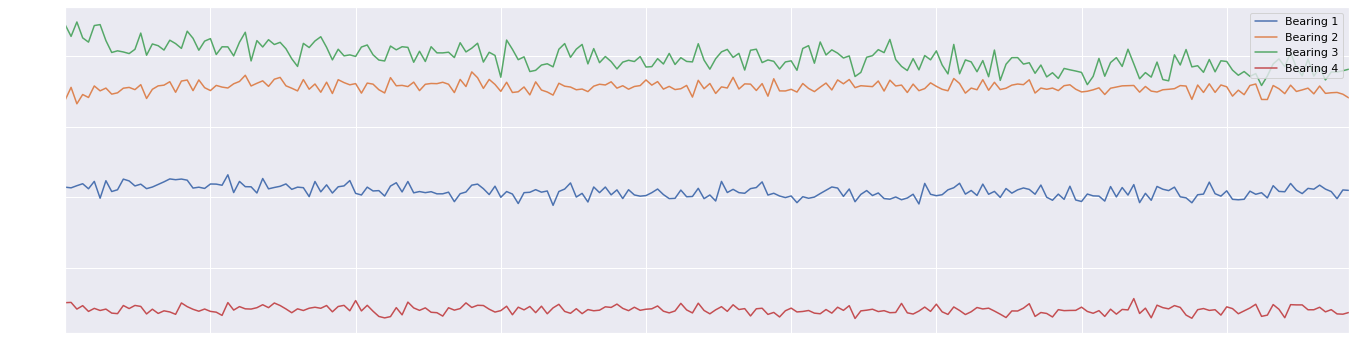

In [ ]:
dataset_train = merged_data['2004-02-12 11:02:39':'2004-02-13 23:52:39']
dataset_test = merged_data['2004-02-13 23:52:39':]
dataset_train.plot(figsize = (23,6))

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

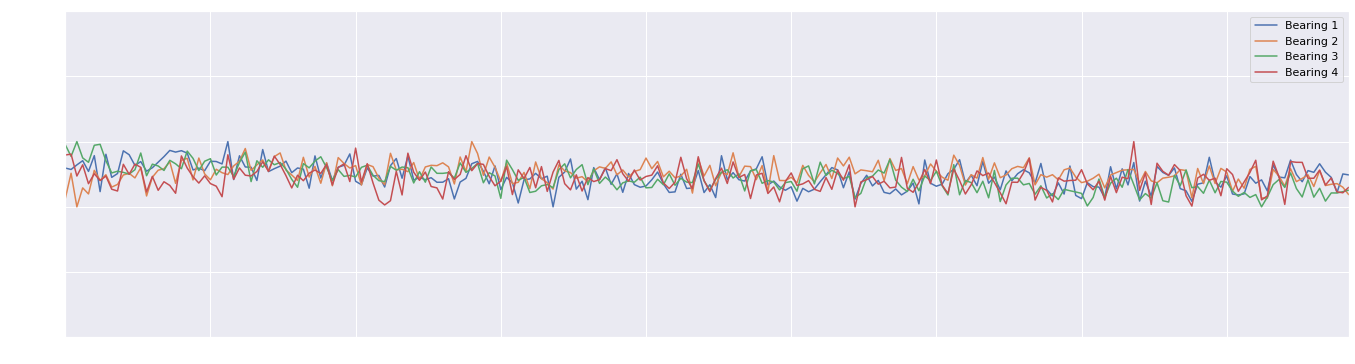

In [ ]:
X_train.plot(figsize = (23,6),ylim=[-2,3])

In [ ]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(X_train.shape[1],activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_62 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_63 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 44        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 210 samples, validate on 12 samples
Epoch 1/100
210/210 [==============================] - 1s 7ms/step - loss: 0.4407 - val_loss: 0.2502
Epoch 2/100
210/210 [==============================] - 0s 178us/step - loss: 0.2627 - val_loss: 0.1520
Epoch 3/100
210/210 [==============================] - 0s 176us/step - loss: 0.1674 - val_loss: 0.1007
Epoch 4/100
210/210 [==============================] - 0s 172us/step - loss: 0.1149 - val_loss: 0.0710
Epoch 5/100
210/210 [==============================] - 0s 184us/step - loss: 0.0825 - val_loss: 0.0527
Epoch 6/100
210/210 [==============================] - 0s 196us/step - loss: 0.0617 - val_loss: 0.0417
Epoch 7/100
210/210 [==============================] - 0s 195us/step - loss: 0.0481 - val_loss: 0.0347
Epoch 8/100
210/210 [==============================] - 0s 168us/step - loss: 0.0396 - val_loss: 0.0297
Epoch 9/100
210/210 [==============================] - 0s 169us/step - loss: 0.0339 - val_loss: 0.0274
Epoch 10/100
210/210 [========

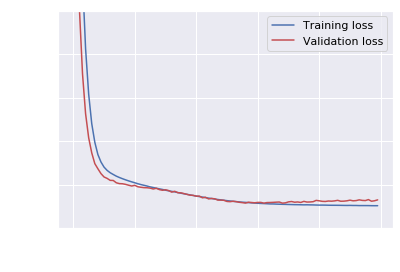

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.5)

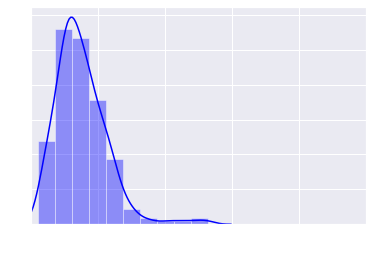

In [ ]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [ ]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.3
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2004-02-13 23:52:39,0.129961,0.3,False
2004-02-14 00:02:39,0.091962,0.3,False
2004-02-14 00:12:39,0.037596,0.3,False
2004-02-14 00:22:39,0.075422,0.3,False
2004-02-14 00:32:39,0.117383,0.3,False


'2004-02-19 06:22:39'

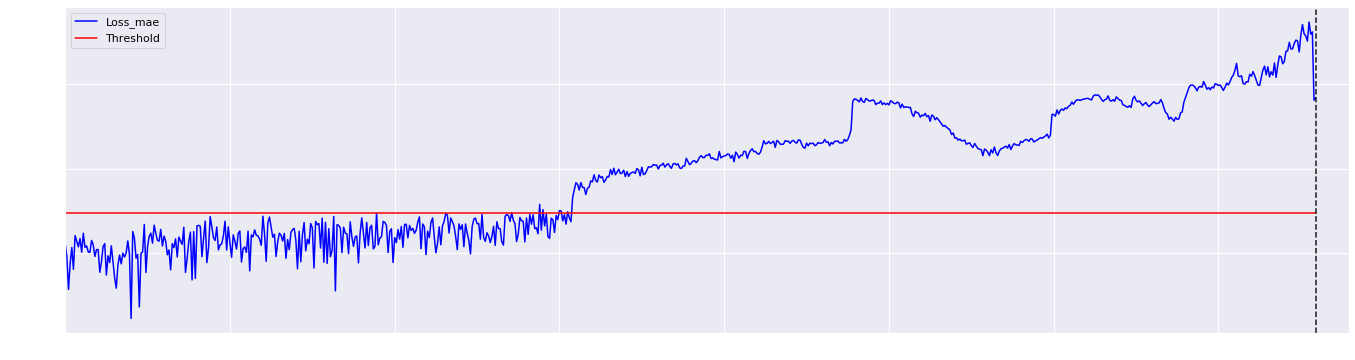

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]

In [ ]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

'2004-02-19 06:22:39'

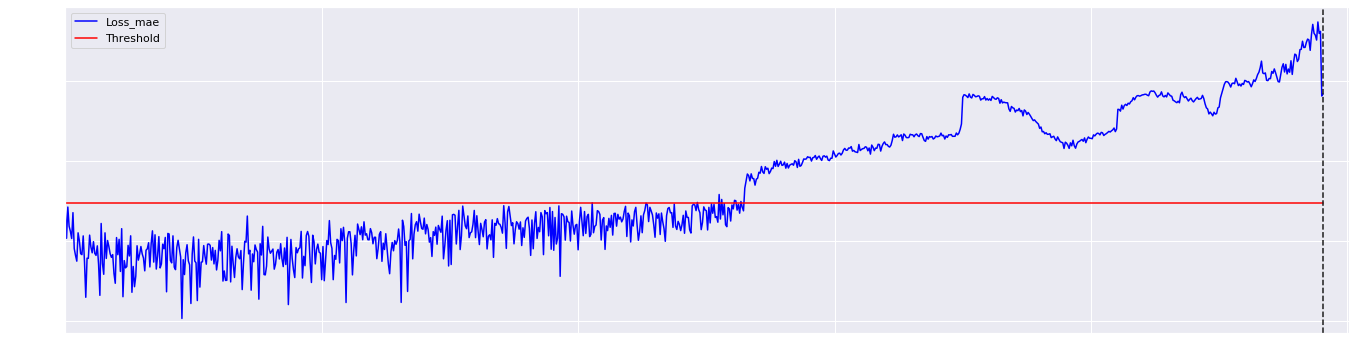

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]

In [ ]:
data_dir = '4th_test'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,4))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']

2004.04.10.21.31.57
2004.04.10.20.01.57
2004.04.10.21.11.57
2004.04.10.21.41.57
2004.04.10.22.11.57
2004.04.10.22.01.57
2004.04.10.22.31.57
2004.04.10.22.21.57
2004.04.10.21.51.57
2004.04.10.23.21.57
2004.04.10.23.11.57
2004.04.10.22.41.57
2004.04.10.23.01.57
2004.04.10.22.51.57
2004.04.10.23.31.57
2004.04.10.23.51.57
2004.04.11.01.11.57
2004.04.11.01.21.57
2004.04.11.01.01.57
2004.04.11.00.01.57
2004.04.11.00.41.57
2004.04.11.00.51.57
2004.04.11.00.11.57
2004.04.10.23.41.57
2004.04.11.01.31.57
2004.04.11.00.31.57
2004.04.11.00.21.57
2004.04.11.01.41.57
2004.04.11.02.01.57
2004.04.11.02.21.57
2004.04.11.02.11.57
2004.04.11.02.31.57
2004.04.11.03.21.57
2004.04.11.02.41.57
2004.04.11.02.51.57
2004.04.11.01.51.57
2004.04.11.03.01.57
2004.04.11.03.11.57
2004.04.11.03.31.57
2004.04.11.04.11.57
2004.04.11.05.11.57
2004.04.11.04.21.57
2004.04.11.04.51.57
2004.04.11.04.41.57
2004.04.11.04.31.57
2004.04.11.03.41.57
2004.04.11.05.21.57
2004.04.11.03.51.57
2004.04.11.05.01.57
2004.04.11.04.01.57


In [ ]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_4.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617


In [ ]:
ab = merged_data.index
print(ab[0])
print(len(ab))
print(.7*len(ab))
print(.3*len(ab))
print(ab[4427])

2004-03-04 09:27:46
6324
4426.799999999999
1897.1999999999998
2004-04-04 15:41:57


In [ ]:
merged_data = pd.read_csv('merged_dataset_BearingTest_4.csv', index_col=0)

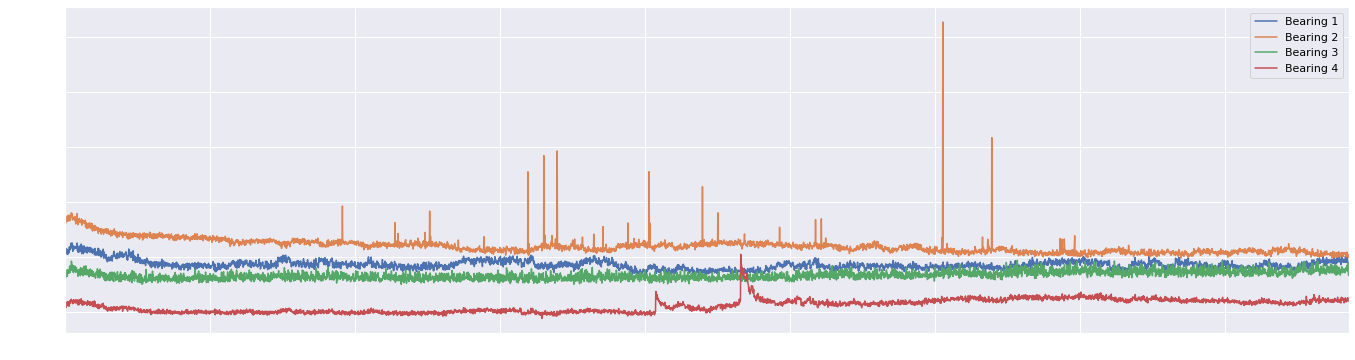

In [ ]:
dataset_train = merged_data['2004-03-04 09:27:46':'2004-04-04 15:41:57']
dataset_test = merged_data['2004-04-04 15:41:57':]
dataset_train.plot(figsize = (23,6))

In [ ]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

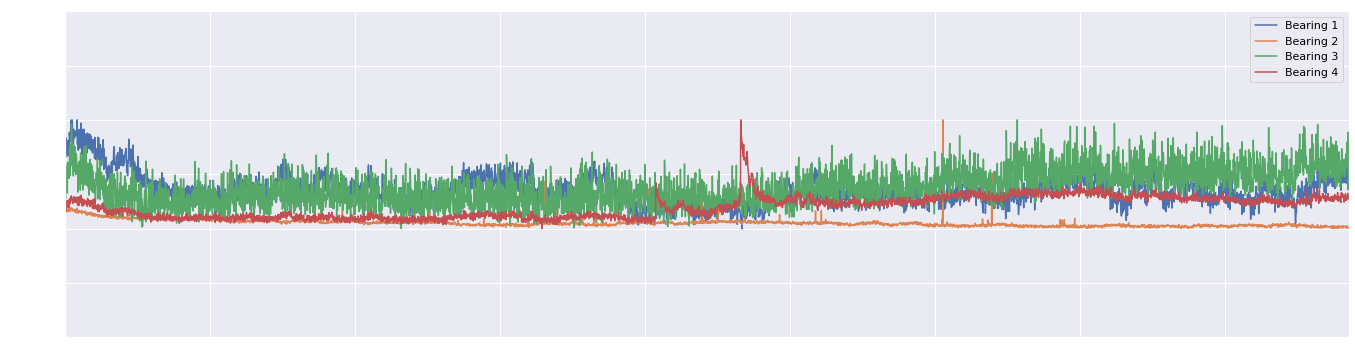

In [ ]:
X_train.plot(figsize = (23,6),ylim=[-1,2])

In [ ]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_47 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 44        
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 4206 samples, validate on 222 samples
Epoch 1/100
4206/4206 [==============================] - 2s 370us/step - loss: 0.0301 - val_loss: 0.0160
Epoch 2/100
4206/4206 [==============================] - 1s 149us/step - loss: 0.0078 - val_loss: 0.0071
Epoch 3/100
4206/4206 [==============================] - 1s 146us/step - loss: 0.0032 - val_loss: 0.0026
Epoch 4/100
4206/4206 [==============================] - 1s 147us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/100
4206/4206 [==============================] - 1s 145us/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/100
4206/4206 [==============================] - 1s 146us/step - loss: 0.0022 - val_loss: 0.0017
Epoch 7/100
4206/4206 [==============================] - 1s 141us/step - loss: 0.0022 - val_loss: 0.0016
Epoch 8/100
4206/4206 [==============================] - 1s 144us/step - loss: 0.0022 - val_loss: 0.0015
Epoch 9/100
4206/4206 [==============================] - 1s 145us/step - loss: 0.0021 - val_loss: 0.0017
Epoch 10

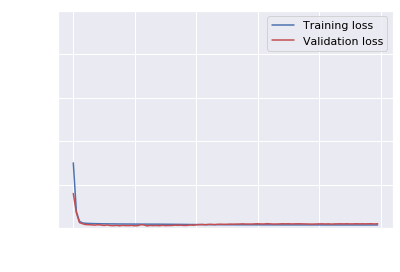

In [ ]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.3)

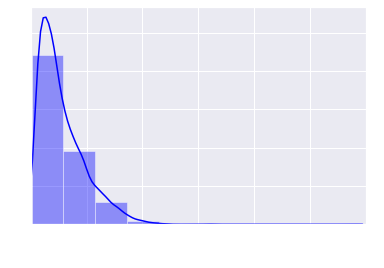

In [ ]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.3])

In [ ]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.4
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2004-04-04 15:41:57,0.068910,0.4,False
2004-04-04 15:51:57,0.013011,0.4,False
2004-04-04 16:01:57,0.042319,0.4,False
2004-04-04 16:11:57,0.024456,0.4,False
2004-04-04 16:21:57,0.045565,0.4,False


'2004-04-18 02:42:55'

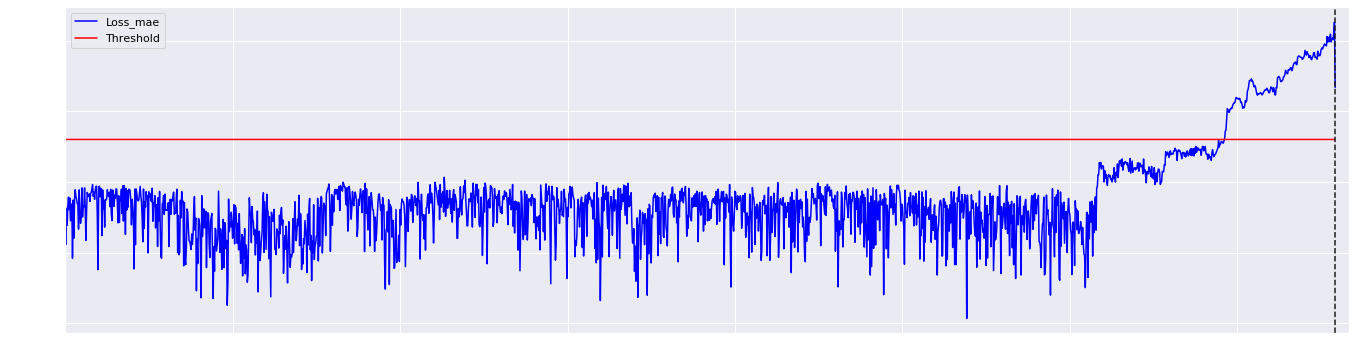

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]

In [ ]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.4
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

'2004-04-18 02:42:55'

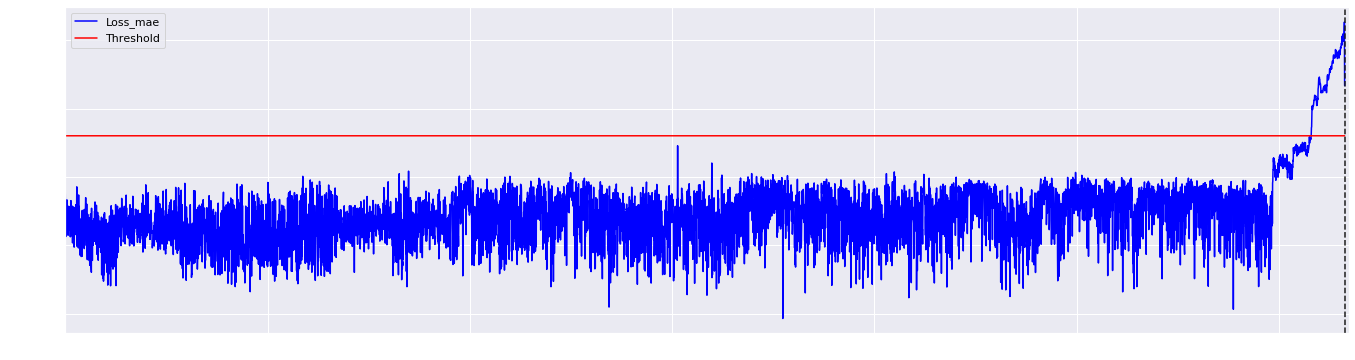

In [ ]:
ax=scored.plot(logy=True,  figsize = (23,6), color = ['blue','red'])
ax.axvline(x=(ax.get_xlim())[1] ,color='k', linestyle='--')
ax.set_xlim(np.array([0, 20])+ax.get_xlim())
scored.index[-1]